## Final Project Submission

Please fill out:
* Student name: Katie Welliver
* Student pace: full time
* Scheduled project review date/time: Friday Dec 22 2:45pm
* Instructor name: Rafael
* Blog post URL:

In [609]:
#import all necessary libraries 
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [610]:
#import data set
#view data set
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [611]:
#view number of columns and rows
df.shape

(21597, 21)

In [612]:
#view housing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# First Thoughts
     - after looking through the data info, i noticed some values are listed as objects, not int or floats
     - must change objects to float/int to be able to use
     - want to load the descriptive statistics
     - check for null values

In [613]:
#find the statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [614]:
#check for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [615]:
# drop all rows with null values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [616]:
#change value with type: object to float
df = df.convert_objects(convert_numeric=True)
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Next Steps
    - clean up data
    - look for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c37e03f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1c32dddc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c37e03e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c32de54e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c32de5908>],
 'means': []}

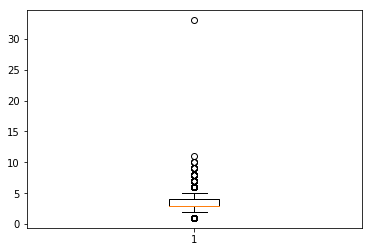

In [617]:
# plot a box plot to look for outliers
plt.boxplot(df['bedrooms'])

In [618]:
#drop outlier
df.drop(df[df.bedrooms > 30].index, inplace=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576100e+04,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15428.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,4.593503e+09,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,0.229998,3.410761,7.663790,1792.823235,291.792650,1971.112747,82.445467,98077.556627,47.559169,-122.213512,1990.261468,12900.935854
std,2.876117e+09,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.761346,0.651859,1.172264,828.408080,443.374451,29.337125,397.224684,53.416216,0.138630,0.140708,684.143985,27978.041388
min,1.000102e+06,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125079e+09,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1847.000000,7620.000000
75%,7.334501e+09,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10108.000000
max,9.895000e+09,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1c32ea2d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c32eaa9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c32ea2be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c32eaaef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c32eb26a0>],
 'means': []}

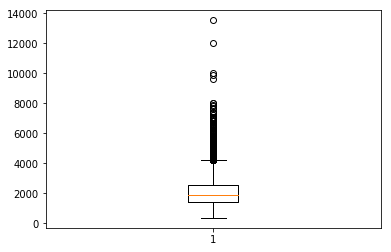

In [619]:
#plot box plot to look for outliers
plt.boxplot(df['sqft_living'])

In [620]:
df.drop(index=df["sqft_living"].idxmax(), inplace=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576000e+04,1.576000e+04,15760.000000,15760.000000,15760.000000,1.576000e+04,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15427.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000
mean,4.593717e+09,5.412006e+05,3.376840,2.120447,2083.814975,1.526285e+04,1.495082,0.007614,0.229759,3.410787,7.663515,1792.339911,291.543852,1971.110977,82.450698,98077.558185,47.559162,-122.213527,1990.080013,12887.934645
std,2.876083e+09,3.719909e+05,0.904647,0.765383,914.124817,4.176053e+04,0.539238,0.086929,0.760778,0.651871,1.171792,826.209095,442.310508,29.337215,397.236744,53.417552,0.138631,0.140701,683.786306,27931.276331
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125320e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.570950,-122.229000,1846.000000,7620.000000
75%,7.334526e+09,6.446250e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10106.500000
max,9.895000e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


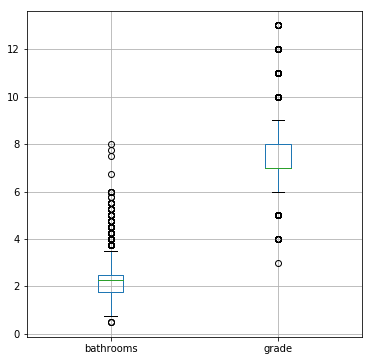

In [621]:
#plt.boxplot(df['sqft_living'])
df[["bathrooms", "grade"]].boxplot(figsize  = [6, 6]);

## Notes:
    - bedrooms had an outlier of 33 bedrooms, dropped value
    - sqft_living max value was an outlier, dropped value
    - bathrooms and grade did not have any large outliers, did not dorp any values


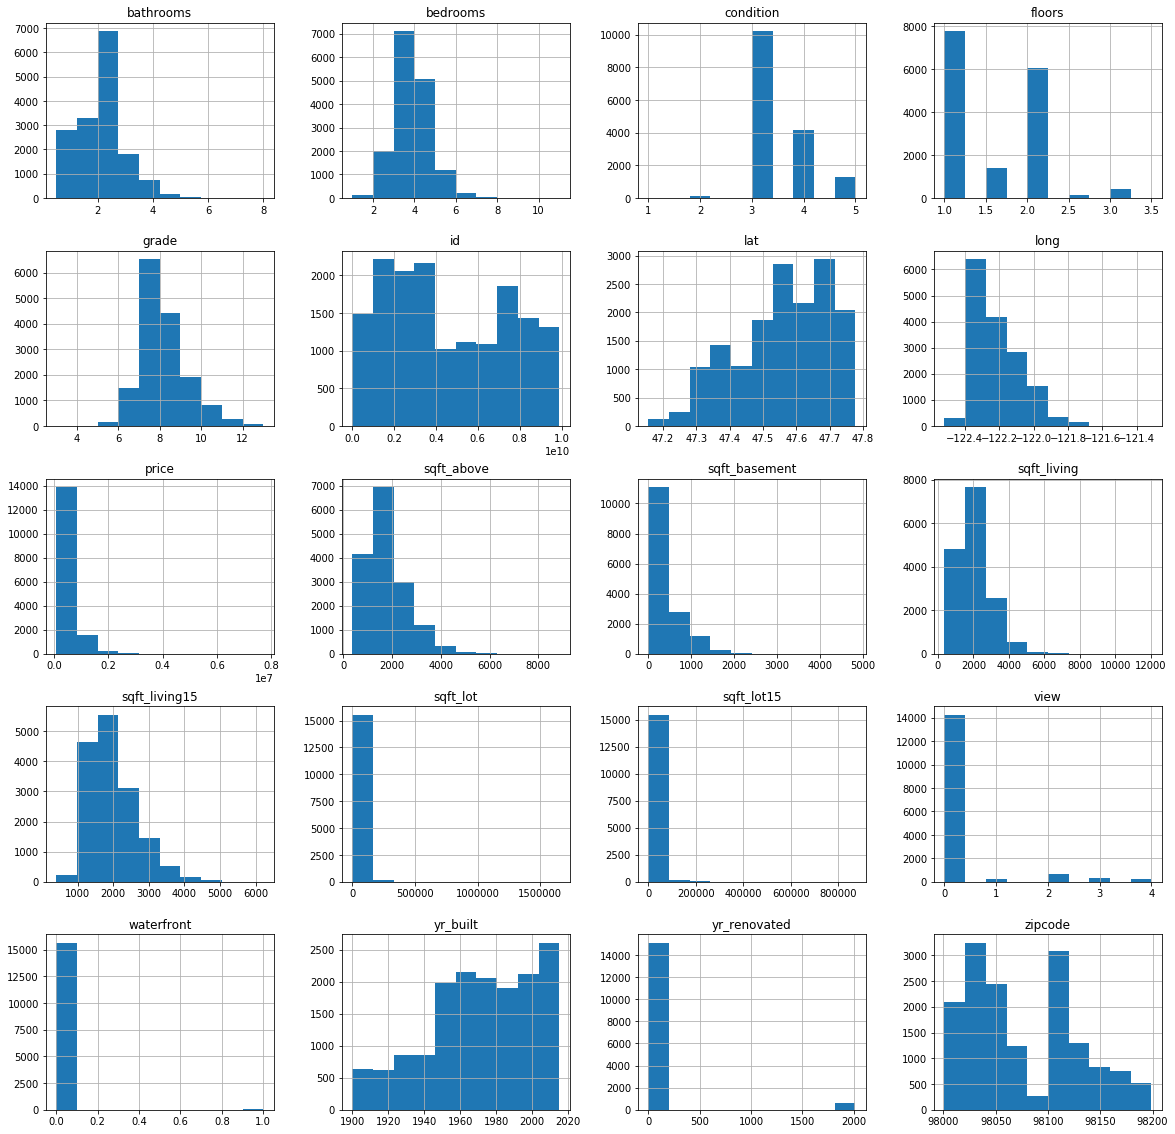

In [622]:
df.hist(figsize =(20,20));

# View Correlation among values

In [623]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.014835,0.009953,0.006128,-0.007390,-0.135449,0.020708,-0.001526,0.015005,-0.023269,0.008947,-0.008538,0.000383,0.023866,-0.010225,-0.007416,-0.004865,0.019785,0.001161,-0.140985
price,-0.014835,1.000000,0.314341,0.525239,0.706490,0.082621,0.258944,0.274430,0.395984,0.034543,0.663815,0.611386,0.318430,0.049114,0.122882,-0.049409,0.306587,0.020766,0.581092,0.077422
bedrooms,0.009953,0.314341,1.000000,0.529683,0.593872,0.025047,0.187863,-0.005827,0.082747,0.015854,0.366670,0.491258,0.309373,0.159905,0.018506,-0.153130,-0.008245,0.135101,0.405165,0.024863
bathrooms,0.006128,0.525239,0.529683,1.000000,0.752898,0.077218,0.504886,0.065852,0.178979,-0.130176,0.664471,0.684311,0.276967,0.505326,0.047171,-0.199764,0.029635,0.222383,0.568624,0.078694
sqft_living,-0.007390,0.706490,0.593872,0.752898,1.000000,0.160841,0.359047,0.112113,0.283201,-0.062062,0.765436,0.875571,0.431175,0.315018,0.050641,-0.197137,0.058096,0.239426,0.757531,0.172161
sqft_lot,-0.135449,0.082621,0.025047,0.077218,0.160841,1.000000,-0.011195,0.026060,0.075047,-0.015750,0.107515,0.170852,0.012996,0.051226,0.002240,-0.129486,-0.084773,0.231293,0.143833,0.717573
floors,0.020708,0.258944,0.187863,0.504886,0.359047,-0.011195,1.000000,0.018397,0.026652,-0.260883,0.459485,0.528999,-0.244343,0.486993,-0.000696,-0.058038,0.058124,0.129483,0.281427,-0.014915
waterfront,-0.001526,0.274430,-0.005827,0.065852,0.112113,0.026060,0.018397,1.000000,0.410120,0.016467,0.083088,0.077421,0.089620,-0.024069,0.087798,0.030392,-0.015926,-0.042324,0.090659,0.029726
view,0.015005,0.395984,0.082747,0.178979,0.283201,0.075047,0.026652,0.410120,1.000000,0.046644,0.247810,0.168408,0.271758,-0.057007,0.098525,0.086701,0.008182,-0.079094,0.276824,0.069361
condition,-0.023269,0.034543,0.015854,-0.130176,-0.062062,-0.015750,-0.260883,0.016467,0.046644,1.000000,-0.147670,-0.157910,0.163692,-0.366865,-0.060834,0.001593,-0.022368,-0.105662,-0.096095,-0.004810


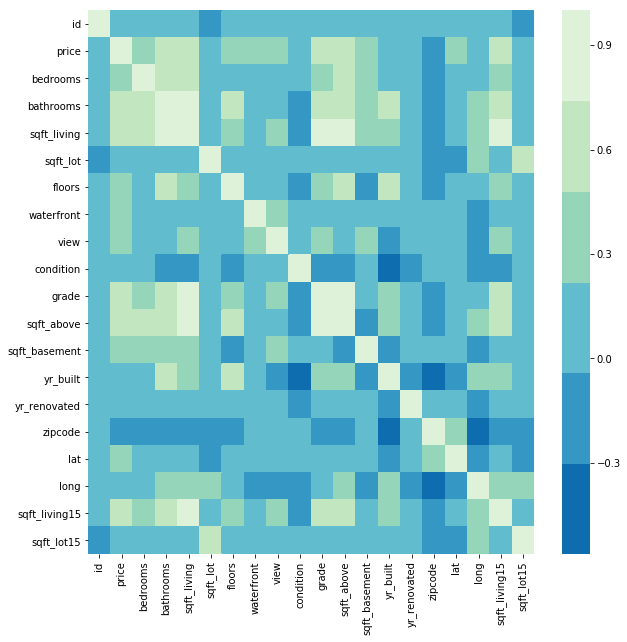

In [624]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=sns.color_palette("GnBu_r"))

# Question 1: Does sqft affect price of houses?


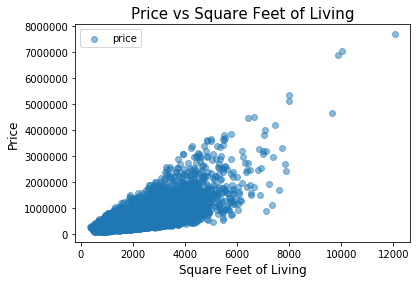

In [625]:
plt.scatter(df.sqft_living, df.price, alpha=0.5)
plt.xlabel('Square Feet of Living', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Square Feet of Living', fontsize=15)
plt.legend()
plt.show()

In [626]:
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:            -2.1906e+05
No. Observations:               15760   AIC:                         4.381e+05
Df Residuals:                   15758   BIC:                         4.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.789e+04   5220.529    -11.089      0.000   -6.81e+04   -4.77e+04
sqft_living   287.4967      2.294    125.312      0.000     283.000     291.994
==============================================================================
Omnibus:                    11113.685   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           450053.113
Skew:                           2.906   Prob(JB):                         0.00
Kurtosis:                      28.526   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations:
First i looked at the sqft living, which is the footage of the home. In order to get the total sqaure footage of the house, I will need to combine the sqft of the basement with sqft of above.

In [627]:
sqft_total = df['sqft_living']+df['sqft_basement']
df.insert(loc=7, column='sqft_total', value=sqft_total)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2970.0,2.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,2870.0,1.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680.0,1.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,6950.0,1.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,NaN,2.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819


In [628]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
sqft_total       333
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    333
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [629]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_total       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

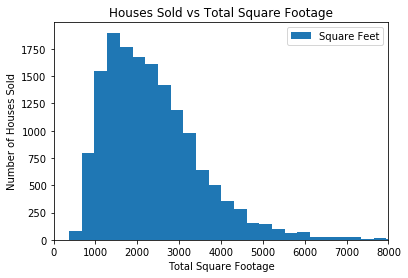

In [630]:
x = df.sqft_total
plt.hist(x, bins=50, label='Square Feet')
plt.xlim(0,8000)
plt.locator_params(axis='x', nbins=12)
plt.xlabel('Total Square Footage')
plt.ylabel('Number of Houses Sold')
plt.legend()
plt.title('Houses Sold vs Total Square Footage');


- The histogram shows house that the majority of house purchased are between 1500 and 3000 sqaure feet. We can confirm this information further by looking at the describtive statistics. 

In [631]:
df.sqft_total.describe()

count    15427.000000
mean      2376.348091
std       1175.496110
min        370.000000
25%       1500.000000
50%       2170.000000
75%       2990.000000
max      15530.000000
Name: sqft_total, dtype: float64

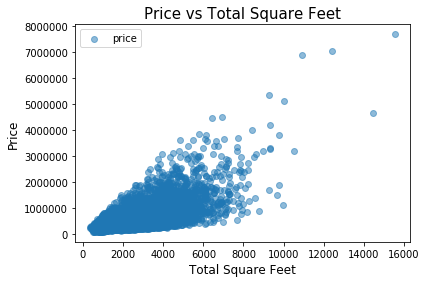

In [632]:
x = df.sqft_total
y = df.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Total Square Feet', fontsize=15)
plt.legend()
plt.show()

As you cans ee there is a strong correlation between the price of a home and the total square footage. Lets try to break down the total square footage to see if we can get a more accurate correlation. We can breakdown the square footage by cutting it in half at the mean value of the home.

In [633]:
#Here we will split the data of total square footage at the mean
over_2377 = df.loc[df['sqft_total'] > 2377]
below_2377 = df.loc[df['sqft_total'] < 2377]

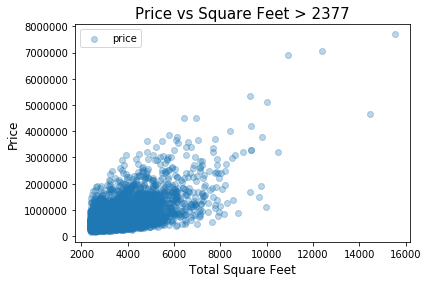

In [634]:
x_2 = over_2377.sqft_total
y_2 = over_2377.price
plt.scatter(x_2, y_2, alpha=0.3)
plt.xlabel('Total Square Feet', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Square Feet > 2377', fontsize=15)
plt.legend(loc=2);

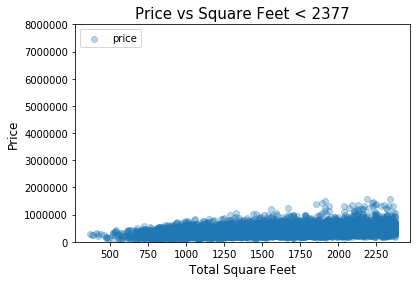

In [635]:
#Need to make sure we adjust the axis so this graph can be compared to the graph of values over 2377
x_3 = below_2377.sqft_total
y_3 = below_2377.price
plt.scatter(x_3, y_3, alpha=0.3)
plt.ylim(0,8000000)
plt.title('Price vs Square Feet < 2377', fontsize=15)
plt.xlabel('Total Square Feet', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc=2)

## Conclusion
As you can see in the above graphs, there is a correlation between price and total square feet of the house. Once we broke down the data of total square feet by the mean value we noticed this relationship further. We saw the houses above the mean had a positive correlation where as price rose so did square feet of living. For square feet values below the mean we noticed that prices rose, but not as significantly.

Thinking further, there must be other factors contributing to the size of the houses such as quality. Next we will look how the grade impacts pricing.

# Question 2: How does the housing grade affect the price?
According to Kings County the grade represents the construction quality of improvements of the houses on a scale from 1-13

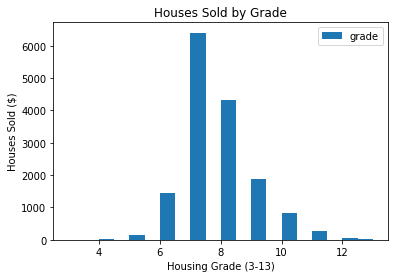

In [636]:
plt.hist(x=df.grade, bins=20, label = 'grade')
plt.xlabel('Housing Grade (3-13)')
plt.ylabel('Houses Sold ($)')
plt.title('Houses Sold by Grade')
plt.legend()

In [637]:
df.grade.describe()

count    15427.000000
mean         7.663966
std          1.173302
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

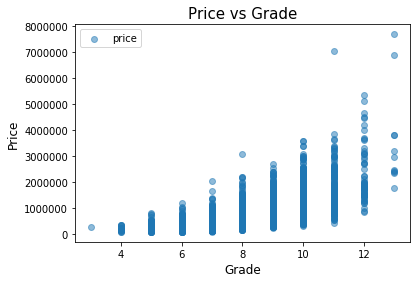

In [638]:
plt.scatter(df.grade, df.price, alpha=0.5)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Grade', fontsize=15)
plt.legend()
plt.show()

Like we did when observing price and square feet, I am going to split the grade value to further see the relationship. Based of our histogram, I am going to split the at our mean of 7.66. We can see from the plot above that all the grades are whole numbers so by splitting the grade at 7.66, we will have values less then 8 and values greater then or equal to 8.

In [639]:
#split grade grade greater and less then 8
eight_greater = df.loc[df["grade"]>7.66]
eight_less = df.loc[df["grade"]<7.66]
print(eight_greater)
print(eight_less)

               id        date      price  bedrooms  bathrooms  sqft_living  \
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
15     9297300055   1/24/2015   650000.0         4       3.00         2950   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
22     7137970340    7/3/2014   285000.0         5       2.50         2270   
24     3814700200  11/20/2014   329000.0         3       2.25         2450   
27     3303700376   12/1/2014   667000.0         3       1.00         1400   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
30     8562750320  11/10/2014   580500.0         3       2.50         2320   
33     7589200193  11/10/2014   535000.0         3       1.00         1090   
35     9547205180   6/13/2014   696000.0         3       2.50         2300   
37     2768000400  12/30/2014   640000.0         4       2.00   

In [640]:
#to find out the number of house above and below 8
print(len(eight_greater))
print(len(eight_less))

7391
8036


In [641]:
eight_greater.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.391000e+03,7.391000e+03,7391.000000,7391.000000,7391.000000,7.391000e+03,7391.000000,7391.000000,7391.000000,7391.000000,...,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000
mean,4.676670e+09,7.165047e+05,3.647409,2.565688,2629.788121,1.815939e+04,2971.126235,1.751116,0.011636,0.373427,...,8.633203,2288.450007,341.338114,1983.921797,88.762549,98068.848600,47.572221,-122.188471,2390.676498,14809.568665
std,2.905949e+09,4.531188e+05,0.838611,0.643996,931.396097,4.677926e+04,1228.566975,0.531730,0.107247,0.955954,...,0.905898,860.467068,507.337664,25.959724,411.930109,49.585057,0.129925,0.141532,705.612132,31494.617191
min,5.200087e+06,1.400000e+05,1.000000,1.000000,750.000000,6.090000e+02,750.000000,1.000000,0.000000,0.000000,...,8.000000,630.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,460.000000,810.000000
25%,2.159850e+09,4.500000e+05,3.000000,2.250000,1990.000000,5.050000e+03,2120.000000,1.000000,0.000000,0.000000,...,8.000000,1640.000000,0.000000,1971.000000,0.000000,98029.000000,47.507450,-122.308000,1890.000000,5189.000000
50%,4.022901e+09,6.099000e+05,4.000000,2.500000,2500.000000,8.088000e+03,2740.000000,2.000000,0.000000,0.000000,...,8.000000,2160.000000,0.000000,1990.000000,0.000000,98056.000000,47.591800,-122.190000,2315.000000,8000.000000
75%,7.506580e+09,8.250000e+05,4.000000,2.750000,3100.000000,1.284550e+04,3540.000000,2.000000,0.000000,0.000000,...,9.000000,2781.500000,660.000000,2004.000000,0.000000,98108.000000,47.670650,-122.088000,2800.000000,11786.000000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,12050.000000,1.024068e+06,15530.000000,3.500000,1.000000,4.000000,...,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.405000,6210.000000,871200.000000


In [642]:
eight_less.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,8.036000e+03,8.036000e+03,8036.000000,8036.000000,8036.000000,8.036000e+03,8036.000000,8036.000000,8036.000000,8036.000000,...,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000
mean,4.518321e+09,3.803090e+05,3.127551,1.712295,1583.562842,1.260831e+04,1829.309109,1.258462,0.003733,0.095445,...,6.772524,1337.816575,245.746267,1959.365480,75.352414,98085.403310,47.547309,-122.236552,1622.989174,11046.803634
std,2.843911e+09,1.542817e+05,0.888022,0.628441,533.746218,3.672293e+04,799.951837,0.425417,0.060990,0.479031,...,0.478820,445.897498,366.727058,27.168266,380.060305,55.630275,0.145383,0.135475,398.802077,23619.190826
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,659.000000
25%,2.117700e+09,2.664975e+05,3.000000,1.000000,1200.000000,5.050000e+03,1230.000000,1.000000,0.000000,0.000000,...,7.000000,1040.000000,0.000000,1943.000000,0.000000,98034.000000,47.442375,-122.338000,1340.000000,5081.500000
50%,3.876520e+09,3.500000e+05,3.000000,1.750000,1520.000000,7.350000e+03,1650.000000,1.000000,0.000000,0.000000,...,7.000000,1250.000000,0.000000,1959.000000,0.000000,98102.000000,47.548350,-122.281000,1570.000000,7460.500000
75%,7.227502e+09,4.630000e+05,4.000000,2.250000,1900.000000,9.605000e+03,2310.000000,1.500000,0.000000,0.000000,...,7.000000,1550.000000,500.000000,1979.000000,0.000000,98125.000000,47.682125,-122.170000,1850.000000,9341.750000
max,9.842300e+09,2.050000e+06,11.000000,7.500000,4480.000000,1.651359e+06,6130.000000,3.000000,1.000000,4.000000,...,7.000000,4190.000000,1860.000000,2014.000000,2015.000000,98199.000000,47.777600,-121.315000,3790.000000,425581.000000


Upon my initial observation you can see that the mean of the houses with a grade greater then 8 is significantly higher than the mean less than 8. See below.

In [643]:
avg_price_greater = np.mean(eight_greater['price'])
print(avg_price_greater)

avg_price_less = np.mean(eight_less['price'])
print(avg_price_less)

avg_difference = avg_price_greater - avg_price_less
print(avg_difference)

716504.6740630496
380309.01455948234
336195.65950356727


You can see form these values that houses with a grade greater than or equal to 8 have a price almost double then those less than. 

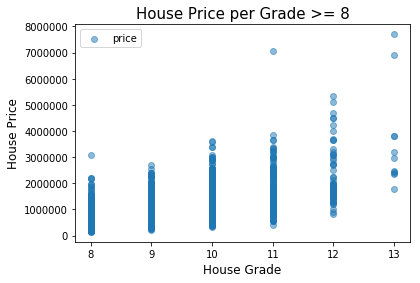

In [644]:
x = eight_greater.grade
y = eight_greater.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price per Grade >= 8', fontsize=15)
plt.xlabel('House Grade', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.legend(loc=2)
plt.show();

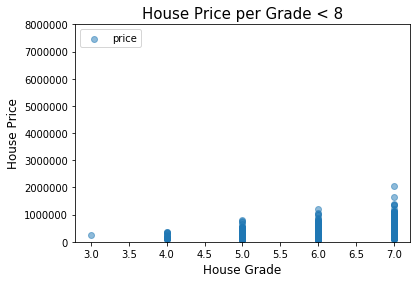

In [645]:
#plot distribution of grade < 8 vs price
#make sure to set y values the same so we can accurately compare the graphs
x = eight_less.grade
y = eight_less.price
plt.scatter(x, y, alpha=0.5)
plt.title('House Price per Grade < 8', fontsize=15)
plt.xlabel('House Grade', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.ylim(0,8000000)
plt.legend(loc=2)
plt.show();

## Conclusion 
After observing the plots above showing the relationship between the grade a price per house we can see a correlation. To take it a step further, i split the grade at the mean of 7.66 as explained above. By splitting the grade data at the mean we were able to look more closely at the relationship. In houses with a grade of 8 or higher we notice that the houses genrally cost more money. While looking at the houses with grades less than 8 we notice the price of houses is significantly lower. 

# One Step Further: Grade and Total Square Feet vs Price
    - now lets compare how prices are affected when using both grade and total square feet together
    - first we must check that grade and total square feet aren't correlated with eachother
        - to do this we will create a data set with just Grade and Total Square Feet to 
          easily see if they are corrlated to each other

In [646]:
# Create new df for analysis and drop all columns from new df except for price, grade, sqft_total
over_SQFT = over_2377.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                     'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)


In [647]:
below_SQFT = below_2377.drop(columns=['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                                    'zipcode', 'lat', 'long', 'sqft_living15',
                                     'sqft_lot15', 'bedrooms', 'bathrooms'], axis=1)


               price  sqft_total     grade
price       1.000000    0.624014  0.624777
sqft_total  0.624014    1.000000  0.481589
grade       0.624777    0.481589  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


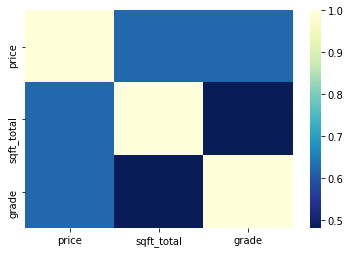

In [589]:
print(over_SQFT.corr())
print(sns.heatmap(over_SQFT.corr(), cmap="YlGnBu_r"))

               price  sqft_total     grade
price       1.000000    0.370385  0.477800
sqft_total  0.370385    1.000000  0.523039
grade       0.477800    0.523039  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


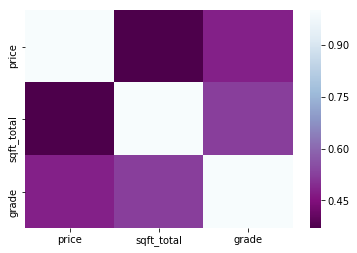

In [590]:
print(below_SQFT.corr())
print(sns.heatmap(below_SQFT.corr(), cmap="BuPu_r"))


Before we start to compare total square feet and price to make sure there is no collinearity between the two. If the both had a strong correlation, they both would not make good predictors. Looking at this heat map we can see they don't have a very strong correlation so we can use both of these as a predictor of price. 

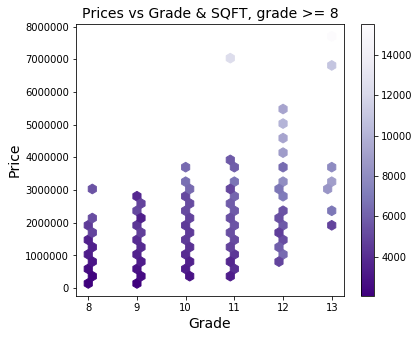

In [591]:
#use a hex plot to plot grade & total square feet vs price

eight_greater.plot.hexbin(x='grade', y='price', C='sqft_total', 
                          gridsize=30, cmap=plt.cm.Purples_r, sharex=False, figsize=(6,5))

plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Prices vs Grade & SQFT, grade >= 8', fontsize=14);



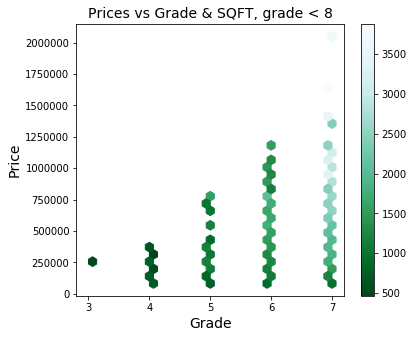

In [592]:
#use a hex plot to plot grade & total square feet vs price

eight_less.plot.hexbin(x='grade', y='price', C='sqft_total', 
                          gridsize=30, cmap=plt.cm.BuGn_r, sharex=False, figsize=(6,5))

plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Prices vs Grade & SQFT, grade < 8', fontsize=14);



Both of these hex plots show a correlation between Grade & Square Foot with Price. In the first plot you can see in the bottom left corner (low price and lower grade) that the data points are darkest, which means the houses also have the smallest square feet. As you move along the x-axis and move up along the y, you can the data points getting lighter. This means that as price and grade increases so does the total square feet of the house. 

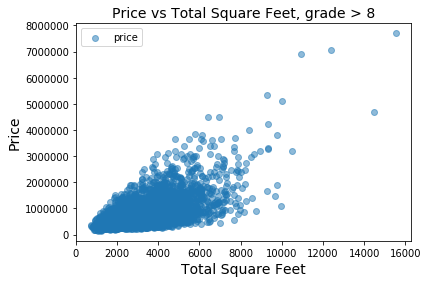

In [593]:
# Plot the distribution of square feet vs price where grade is greater than 8
x = eight_greater.sqft_total
y = eight_greater.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs Total Square Feet, grade > 8', fontsize=14)
plt.legend(loc=2);

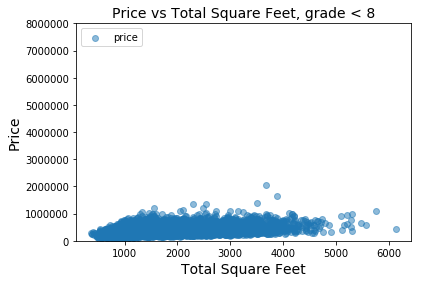

In [594]:
# Plot the distribution of square feet vs to price where grade < 8
# Set y scale equal to that of grade >8 to accurately compare the two
x = eight_less.sqft_total
y = eight_less.price
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs Total Square Feet, grade < 8', fontsize=14)
plt.ylim(0, 8000000)
plt.legend(loc=2);

In [595]:
#find the info for the final data
price = df['price']
sqft_total = df['sqft_total']
grade = df['grade']
data_final = pd.DataFrame([])
data_final = pd.concat([price, sqft_total, grade], axis=1)
y = data_final[["price"]]
X = data_final.drop(["price"], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15427 entries, 1 to 21596
Data columns (total 3 columns):
price         15427 non-null float64
sqft_total    15427 non-null float64
grade         15427 non-null int64
dtypes: float64(2), int64(1)
memory usage: 482.1 KB


In [596]:
data_final.head()

,price,sqft_total,grade
1,538000.0,2970.0,7
3,604000.0,2870.0,7
4,510000.0,1680.0,8
5,1230000.0,6950.0,11
8,229500.0,2510.0,7


In [597]:
#find statistical values for the final data
f = "price ~ sqft_total+grade"
model = ols(formula=f, data=data_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8931.
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:01:02   Log-Likelihood:            -2.1387e+05
No. Observations:               15427   AIC:                         4.277e+05
Df Residuals:                   15424   BIC:                         4.278e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.265e+05   1.49e+04    -48.920      0.000   -7.56e+05   -6.97e+05
sqft_total   130.3186      2.309     56.437      0.000     125.792     134.845
grade        1.25e+05   2313.422     54.044      0.000     1.2e+05     1.3e+05
==============================================================================
Omnibus:                    12990.507   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1010188.324
Skew:                           3.597   Prob(JB):                         0.00
Kurtosis:                      41.985   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary: Plot for Total Square Feet & Grade vs Price

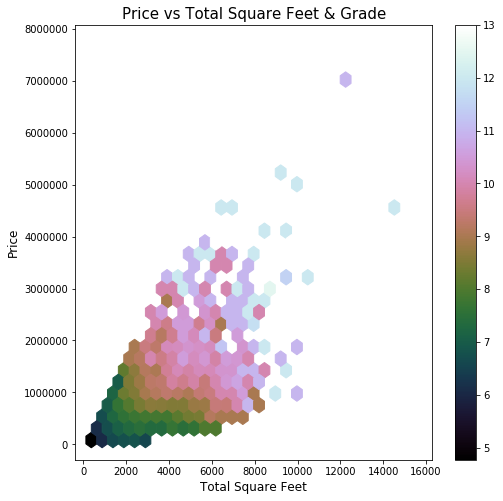

In [598]:
#plot total square feet & grade vs price in a hex plot
df.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="cubehelix", sharex=False, figsize=(8,8))
plt.title('Price vs Total Square Feet & Grade', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()

As shown in the summary hexbin plot above, there is a direct correlation with price vs total square feet & grade. The price increases as the total square feet increases, which we stated earlier. We also can use this plot to observe the grade increase with price as well as square feet. You can notice as we move along the x and y axises the data points change in color. Looking at the bar on the right we see the color change marks the increase in housing grade.

# Question 3: Does location (waterfront vs non waterfront) affect . price?

In [506]:
#split data to water front and nonwater front
df2 = df[df.waterfront==0]
df2.head()

df3 = df[df.waterfront==1]
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,3341.0,1.0,1.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,1670.0,2.0,1.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,5470.0,1.0,1.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,760.0,1.0,1.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,6500.0,1.0,1.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


In [507]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2970.0,2.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,2870.0,1.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680.0,1.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,6950.0,1.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,2510.0,1.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


## Model 1: Sqft Living vs Price on Waterfront

Text(0.5,1,'Sqft Living vs Price on waterfront')

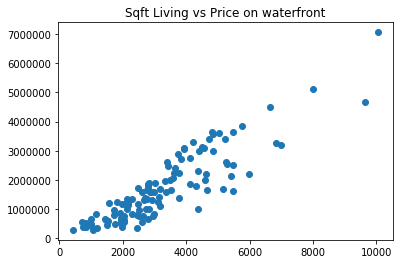

In [508]:
plt.scatter(df3.sqft_living, df3.price)
plt.title("Sqft Living vs Price on waterfront")


In [509]:
f = 'price~sqft_living'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     421.4
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           4.30e-40
Time:                        11:14:15   Log-Likelihood:                -1696.4
No. Observations:                 116   AIC:                             3397.
Df Residuals:                     114   BIC:                             3402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.604e+05   1.09e+05     -2.385      0.019   -4.77e+05   -4.41e+04
sqft_living   604.8661     29.466     20.527      0.000     546.493     663.239
==============================================================================
Omnibus:                        1.130   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.200
Skew:                          -0.224   Prob(JB):                        0.549
Kurtosis:                       2.782   Cond. No.                     7.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2: Sqft Living vs Price not on waterfront 

Text(0.5,1,'Sqft Living vs Price not on Waterfront')

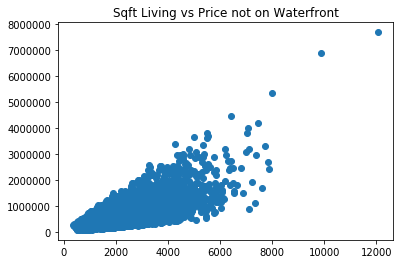

In [510]:
plt.scatter(df2.sqft_living, df2.price)
plt.title("Sqft Living vs Price not on Waterfront")

In [511]:
f = 'price~sqft_living'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.505e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:14:15   Log-Likelihood:            -2.1171e+05
No. Observations:               15311   AIC:                         4.234e+05
Df Residuals:                   15309   BIC:                         4.234e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.741e+04   4973.910     -5.510      0.000   -3.72e+04   -1.77e+04
sqft_living   269.7013      2.198    122.678      0.000     265.392     274.011
==============================================================================
Omnibus:                    10277.926   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420620.380
Skew:                           2.689   Prob(JB):                         0.00
Kurtosis:                      28.108   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 3: Grade vs Price waterfront

Text(0.5,1,'Grade vs Price on Waterfront')

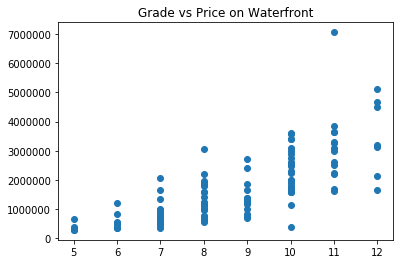

In [512]:
plt.scatter(df3.grade, df3.price)
plt.title("Grade vs Price on Waterfront")

In [513]:
f = 'price~grade'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     133.4
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           6.58e-21
Time:                        11:14:16   Log-Likelihood:                -1741.2
No. Observations:                 116   AIC:                             3486.
Df Residuals:                     114   BIC:                             3492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.54e+06   3.77e+05     -6.745      0.000   -3.29e+06   -1.79e+06
grade       4.848e+05    4.2e+04     11.552      0.000    4.02e+05    5.68e+05
==============================================================================
Omnibus:                       47.847   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.933
Skew:                           1.362   Prob(JB):                     1.27e-42
Kurtosis:                       8.701   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 4: Grade vs Price on not on waterfront

Text(0.5,1,'Grade vs Price not on waterfront')

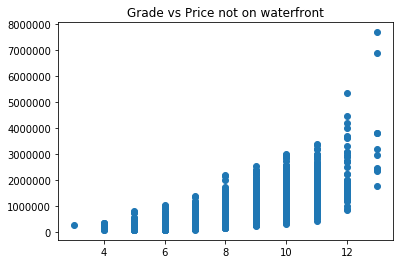

In [514]:
plt.scatter(df2.grade, df2.price)
plt.title("Grade vs Price not on waterfront")

In [515]:
f = 'price~grade'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:14:16   Log-Likelihood:            -2.1229e+05
No. Observations:               15311   AIC:                         4.246e+05
Df Residuals:                   15309   BIC:                         4.246e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.993e+05   1.37e+04    -73.039      0.000   -1.03e+06   -9.72e+05
grade       2.001e+05   1766.927    113.239      0.000    1.97e+05    2.04e+05
==============================================================================
Omnibus:                    13806.097   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1606803.828
Skew:                           3.885   Prob(JB):                         0.00
Kurtosis:                      52.581   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_total,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,3341.0,1.0,1.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,1670.0,2.0,1.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,5470.0,1.0,1.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,760.0,1.0,1.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,6500.0,1.0,1.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


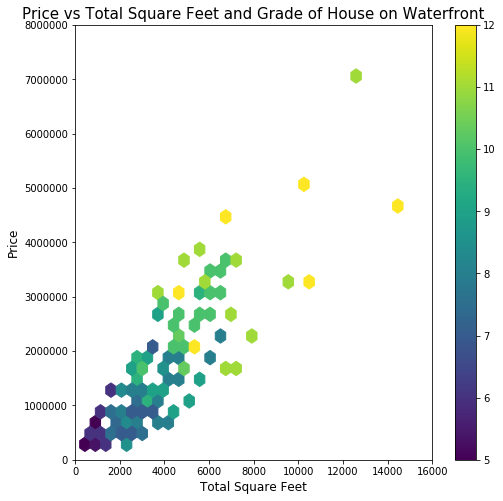

In [603]:

df3.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price vs Total Square Feet and Grade of House on Waterfront', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.ylim(0, 8000000)
plt.xlabel('Total Square Feet', fontsize=12)
plt.xlim(0,16000)
plt.show()

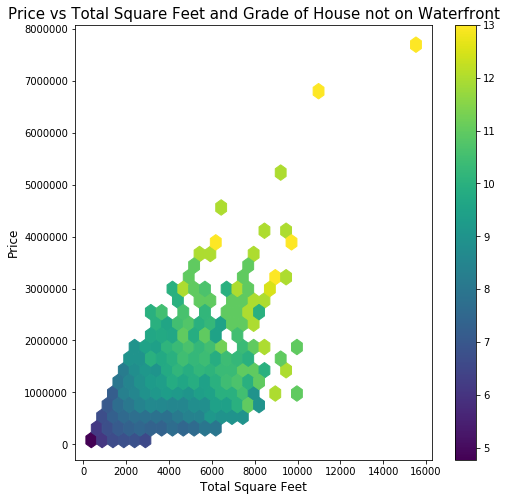

In [525]:

df2.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price vs Total Square Feet and Grade of House not on Waterfront', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()

Looking at these two hex plots of Price vs total square feet & grade on waterfront vs not on waterfront you can see how the location affects property values. In the first hex plot, you can see how the price increases at a stepper rate with sqaure feet because it is on the waterfront versus houses not on the water front as seen in the lower hex plot. As for the grade of the houses you can see there are houses on the waterfront that have a higher grade with a lower total square feet compared to houses not on the water front.

### Question 3 Conclusion

After running the information and viewing them in scatter plots and hex plots the data shows that there is a stronger correlation between price and data values on the water front than not on the water front. The strongest correlation is between price and sqft living on the waterfront, the R squared value is .786. As you can see on the scatter plot there is a strong relationship. While looking at the grade of houses on the waterfront, one can see that there is also a relationship there. The R squared value is .536. The relationship between grade/sqft living and price is not as strong not on the waterfront. Will look at other values to find a correlation for porperties not on the waterfront.  